In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly
import cufflinks
%matplotlib inline
cufflinks.go_offline()

In [2]:
dataset=pd.read_excel("customer_churn_large_dataset.xlsx",engine='openpyxl')

In [3]:
dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
dataset.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
dataset.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


C:\Users\Abhishek Ambast\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning:

The figure layout has changed to tight



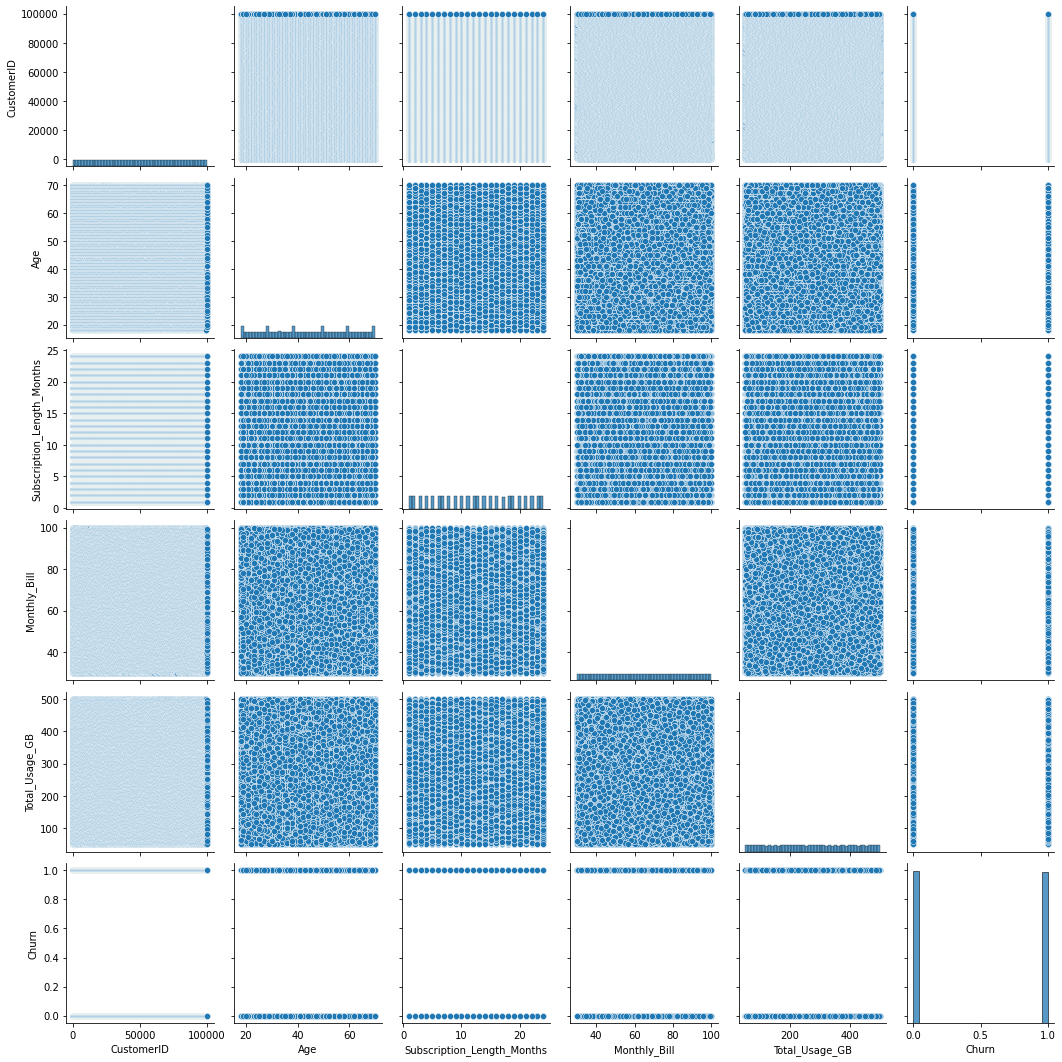

In [7]:
sns.pairplot(dataset)

In [8]:
dataset["Location"].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [9]:
dataset=pd.get_dummies(dataset,columns=["Gender","Location"],drop_first=True)

In [10]:
dataset.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,1,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,0,0,0,1,0


<Axes: xlabel='Churn', ylabel='count'>

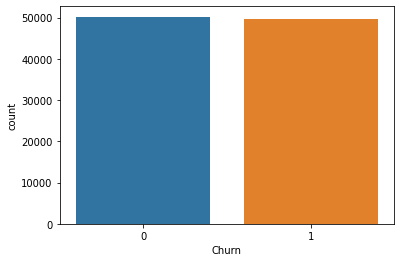

In [11]:
sns.countplot(x=dataset["Churn"])

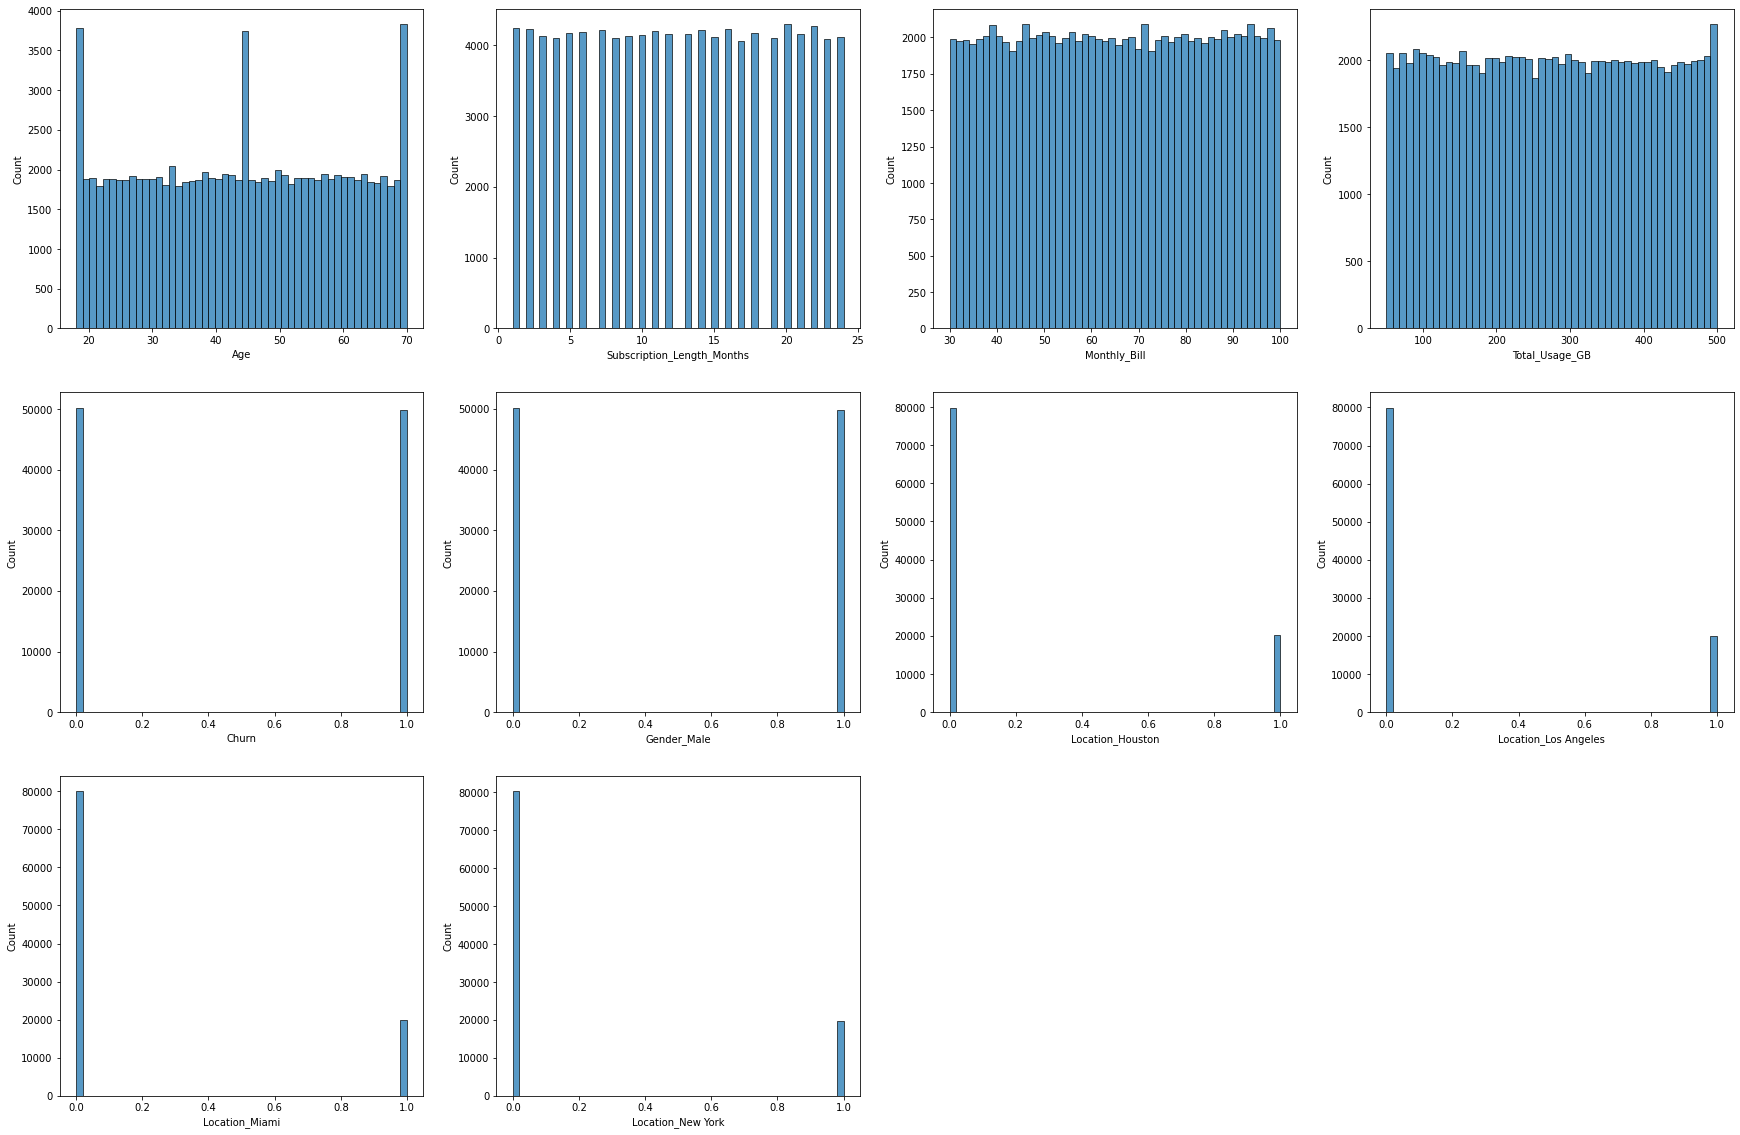

In [12]:
plt.figure(figsize=(30,20))
for i in range(3,dataset.columns.shape[0]+1):
    plt.subplot(3,4,i-2)
    sns.histplot(dataset.iloc[:,i-1],bins=50)

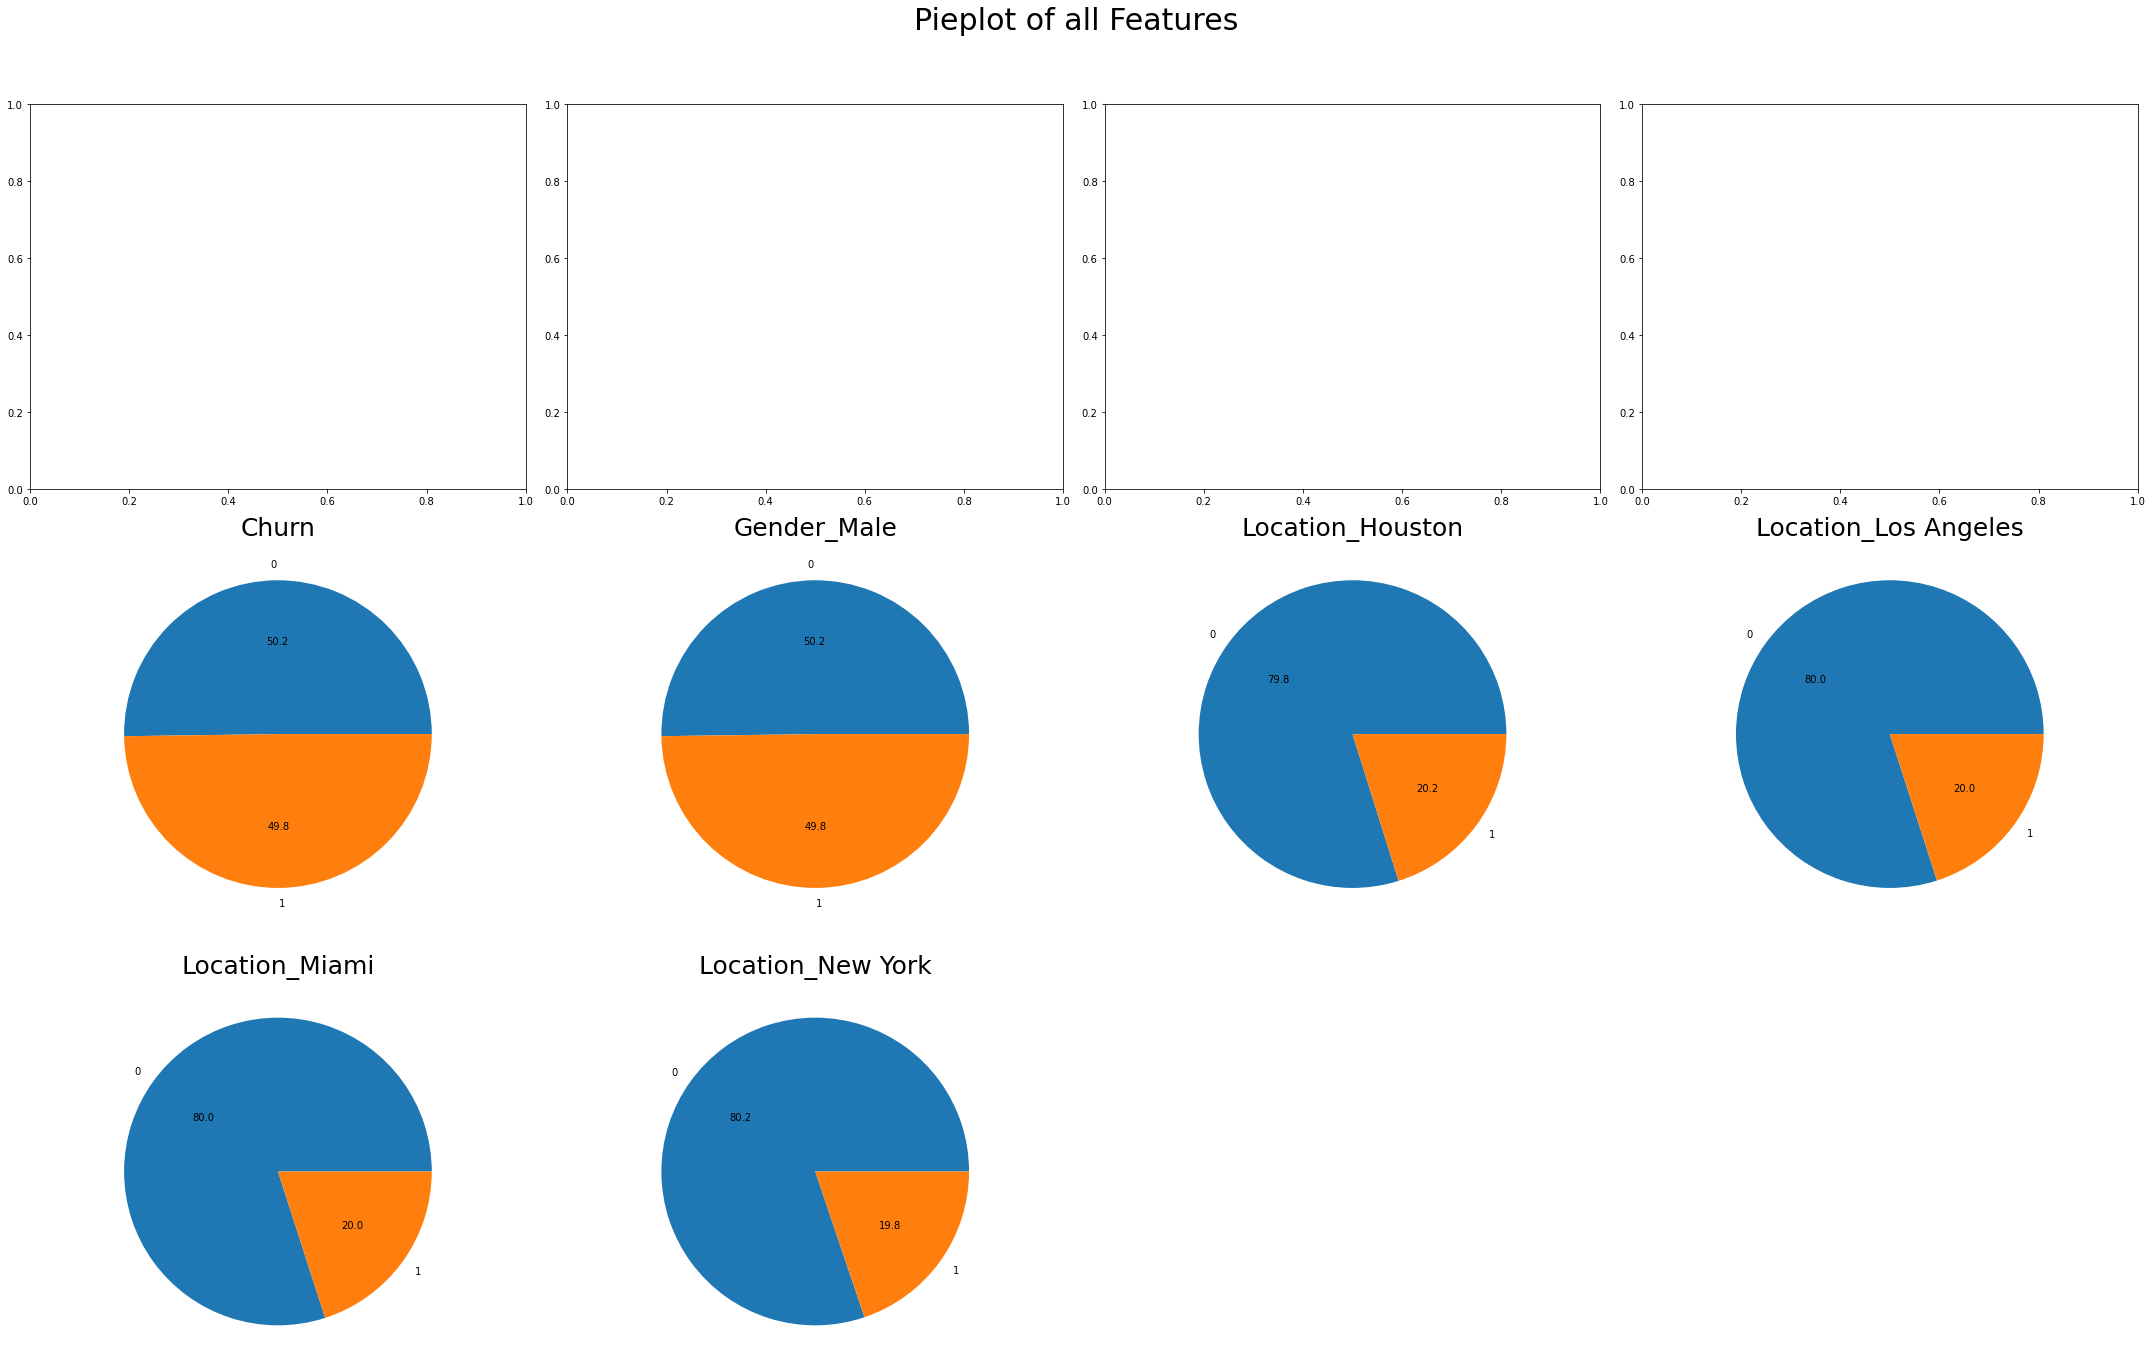

In [13]:
plt.figure(figsize=(30,20))

plt.suptitle("Pieplot of all Features", fontsize=30)

for i in range(3,dataset.shape[1]+1):
    plt.subplot(3,4,i-2)
    if dataset.iloc[:,i-1].value_counts(normalize=True).index.shape[0]>10:
        continue
    plt.pie(dataset.iloc[:,i-1].value_counts(normalize=True).values,labels=dataset.iloc[:,i-1].value_counts(normalize=True).index,autopct="%.1f")
    plt.title(dataset.columns[i-1],fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
identity=dataset[["CustomerID","Name"]]

In [15]:
identity.head()

,CustomerID,Name
0,1,Customer_1
1,2,Customer_2
2,3,Customer_3
3,4,Customer_4
4,5,Customer_5


In [16]:
dataset2=dataset.drop(columns=["CustomerID","Name","Churn"],axis=1)

In [17]:
dataset2.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0


<Axes: title={'center': 'Corr of churn with features'}>

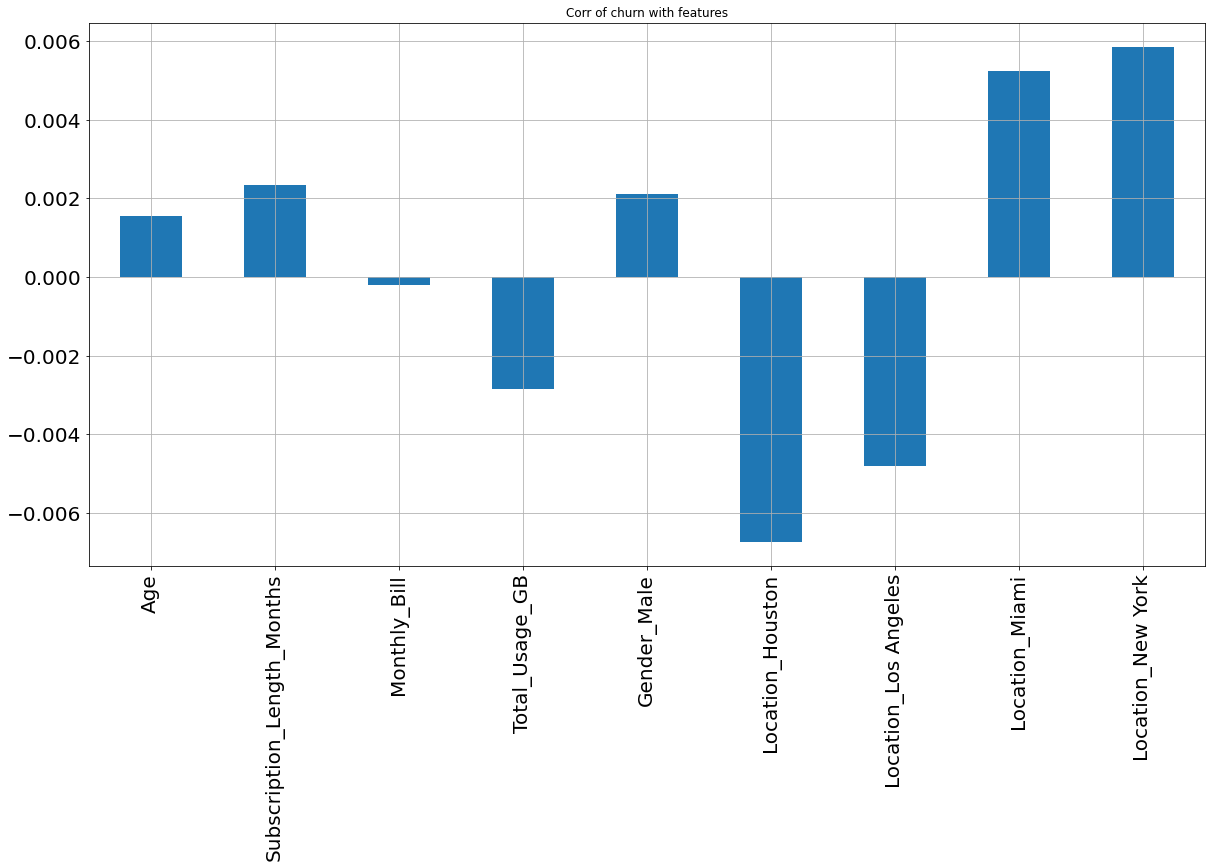

In [18]:
dataset2.corrwith(dataset.Churn).plot.bar(figsize=(20,10),
                                          fontsize=20,
                                          title="Corr of churn with features",
                                          grid=True)

In [19]:
corr=dataset2.corr()

In [20]:
mask=np.zeros_like(corr,dtype=bool)

In [21]:
mask[np.triu_indices_from(mask)]=True

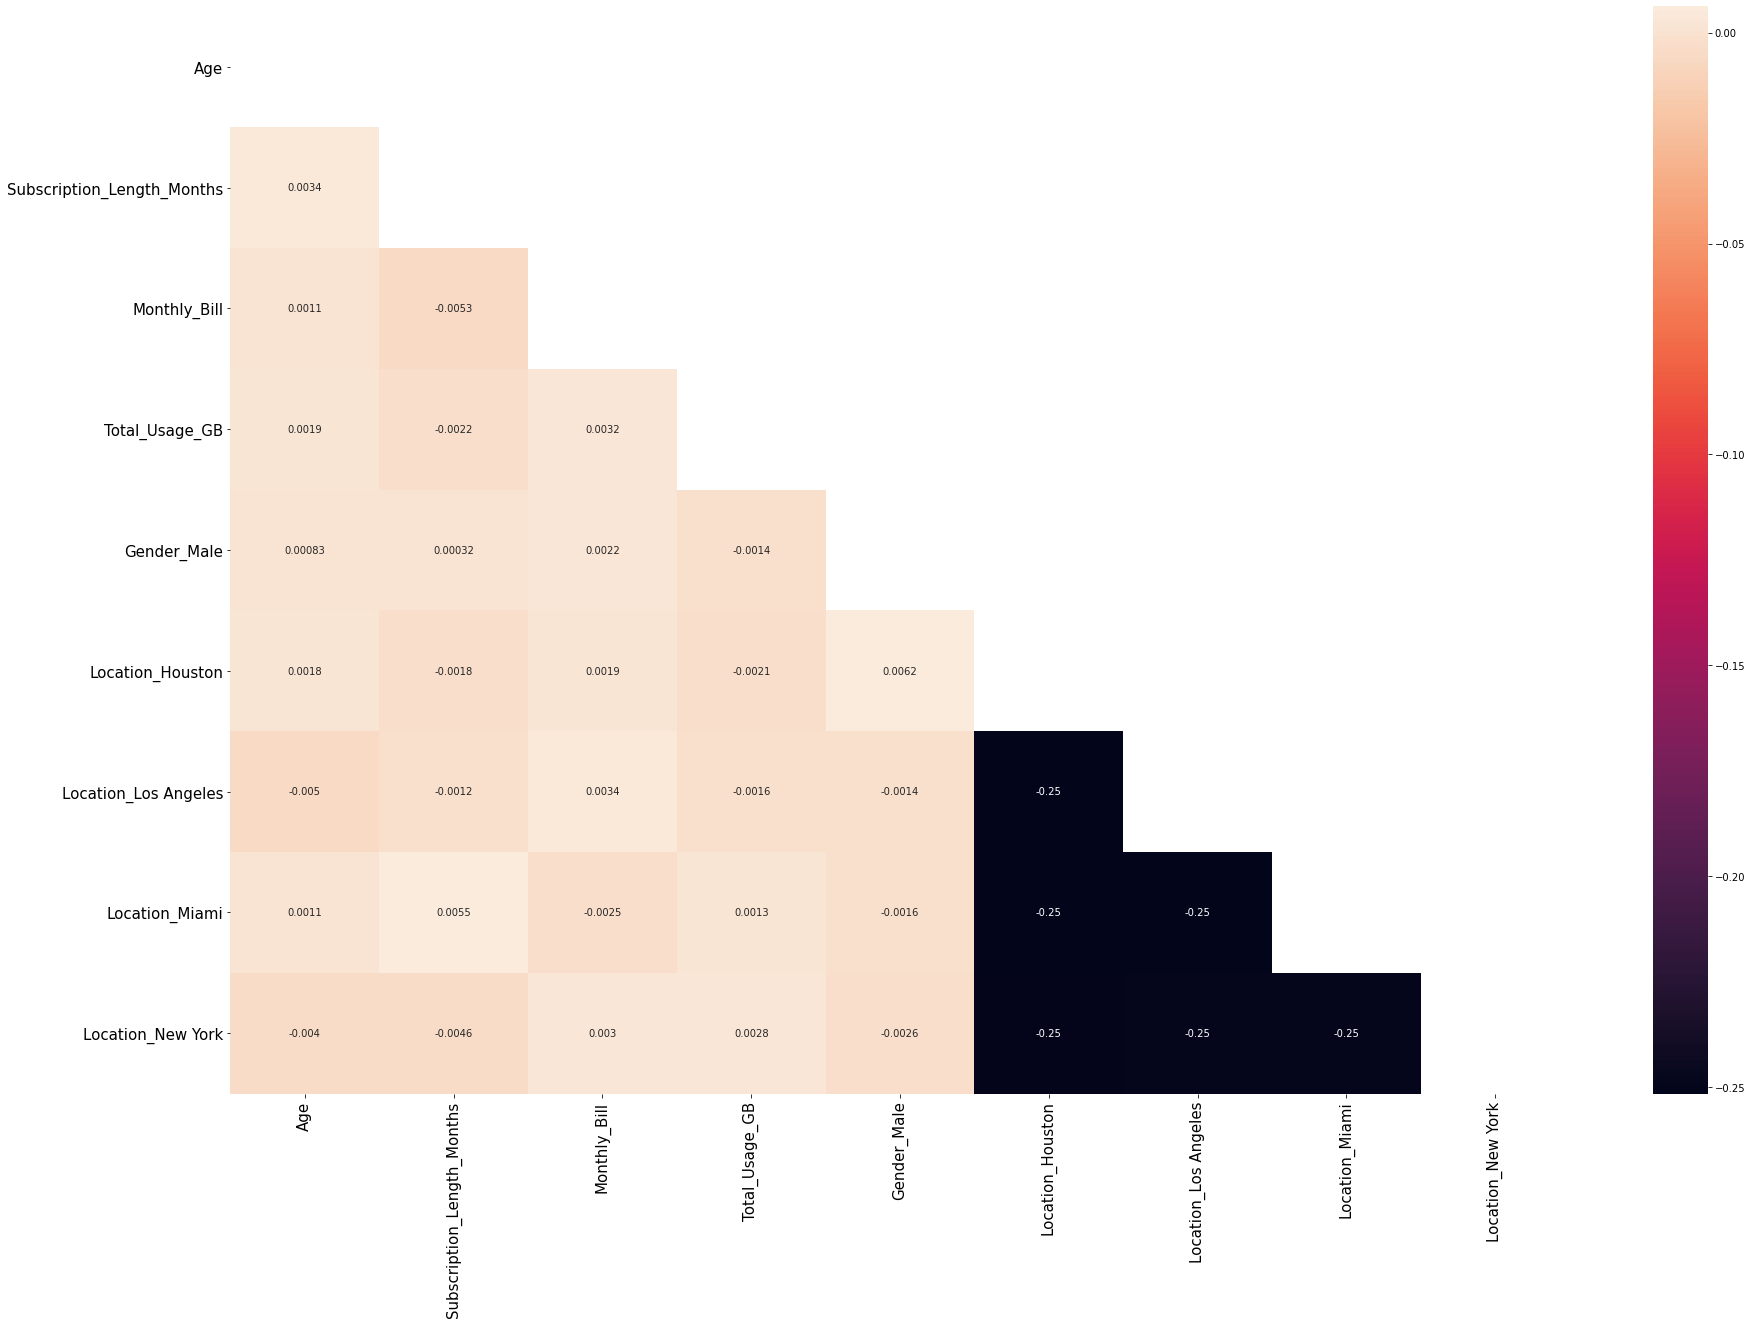

In [22]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,mask=mask,annot=True)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)

plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:

X_train,X_test,y_train,y_test=train_test_split(dataset2,dataset["Churn"],test_size=0.2,random_state=0)

In [25]:

X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
10382,43,13,81.28,160,0,0,0,0,1
73171,37,5,51.28,422,0,0,0,0,0
30938,33,16,84.88,214,0,0,0,0,1
99310,49,11,47.64,485,1,0,0,1,0
58959,20,10,78.75,192,0,0,0,0,1


In [26]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
3582,49,20,52.41,204,0,0,0,0,0
60498,69,18,32.97,307,0,0,0,0,1
53227,61,4,62.70,311,0,0,0,0,1
21333,50,22,74.05,470,1,0,0,1,0
3885,21,22,59.22,369,1,0,0,0,1


In [27]:
X_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.base import TransformerMixin

class CustomeScaler(TransformerMixin):
    def __init__(self):
        self.scaler=StandardScaler()
    def fit(self,vector):
        self.scaler.fit(vector[:,:-5])
        return self
    def transform(self,vector):
        vector_part=self.scaler.transform(vector[:,:-5])
        new_vec=np.concatenate((vector_part,vector[:,-5:]),axis=1)
        return new_vec
        

In [31]:
sc=CustomeScaler()

In [32]:
sc.fit(X_train.to_numpy())

In [33]:
X_train_scaled=pd.DataFrame(sc.transform(X_train.to_numpy()))
X_test_scaled=pd.DataFrame(sc.transform(X_test.to_numpy()))

In [34]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.327621,1.085233,-0.624891,-0.537323,0.0,0.0,0.0,0.0,0.0
1,1.636527,0.796594,-1.585348,0.251315,0.0,0.0,0.0,0.0,1.0
2,1.112964,-1.223881,-0.116502,0.281942,0.0,0.0,0.0,0.0,1.0
3,0.393066,1.373872,0.444259,1.499355,1.0,0.0,0.0,1.0,0.0
4,-1.504847,1.373872,-0.288435,0.726029,1.0,0.0,0.0,0.0,1.0


In [35]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.065051,0.074996,0.801465,-0.874218,0.0,0.0,0.0,0.0,1.0
1,-0.457723,-1.079561,-0.680720,1.131834,0.0,0.0,0.0,0.0,0.0
2,-0.719504,0.507954,0.979328,-0.460757,0.0,0.0,0.0,0.0,1.0
3,0.327621,-0.213643,-0.860559,1.614205,1.0,0.0,0.0,1.0,0.0
4,-1.570293,-0.357963,0.676468,-0.629204,0.0,0.0,0.0,0.0,1.0


In [36]:
X_train_scaled.columns=X_train.columns
X_test_scaled.columns=X_test.columns

In [37]:
X_train_scaled.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,-0.065051,0.074996,0.801465,-0.874218,0.0,0.0,0.0,0.0,1.0
1,-0.457723,-1.079561,-0.680720,1.131834,0.0,0.0,0.0,0.0,0.0
2,-0.719504,0.507954,0.979328,-0.460757,0.0,0.0,0.0,0.0,1.0
3,0.327621,-0.213643,-0.860559,1.614205,1.0,0.0,0.0,1.0,0.0
4,-1.570293,-0.357963,0.676468,-0.629204,0.0,0.0,0.0,0.0,1.0


In [38]:
X_train_scaled.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,-0.065051,0.074996,0.801465,-0.874218,0.0,0.0,0.0,0.0,1.0
1,-0.457723,-1.079561,-0.680720,1.131834,0.0,0.0,0.0,0.0,0.0
2,-0.719504,0.507954,0.979328,-0.460757,0.0,0.0,0.0,0.0,1.0
3,0.327621,-0.213643,-0.860559,1.614205,1.0,0.0,0.0,1.0,0.0
4,-1.570293,-0.357963,0.676468,-0.629204,0.0,0.0,0.0,0.0,1.0


In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
X_train_scaled.shape

(80000, 9)

In [43]:
new_model=Sequential()

In [44]:
new_model.add(Dense(128,activation='relu',input_dim=9))
new_model.add(BatchNormalization())
new_model.add(Dropout(.2,))
new_model.add(Dense(32,activation='relu',input_dim=9))
new_model.add(Dense(1,activation='sigmoid'))

new_model.compile(optimizer=Adam(),loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])


              

In [45]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,953
Trainable params: 5,697
Non-trainable params: 256
____________________________________________________

In [46]:
new_model.fit(x=X_train_scaled,y=y_train,verbose=1,batch_size=100,validation_data=[X_test_scaled,y_test],epochs=10)

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.7141 - accuracy: 0.4987 - val_loss: 0.6979 - val_accuracy: 0.5019
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6983 - accuracy: 0.5025 - val_loss: 0.6950 - val_accuracy: 0.4987
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6954 - accuracy: 0.5046 - val_loss: 0.6945 - val_accuracy: 0.5042
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6940 - accuracy: 0.5080 - val_loss: 0.6948 - val_accuracy: 0.5011
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6938 - accuracy: 0.5048 - val_loss: 0.6938 - val_accuracy: 0.5048
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5057 - val_loss: 0.6935 - val_accuracy: 0.4974
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6937 - val_accuracy: 0.5019
Epoch 

C:\Users\Abhishek Ambast\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



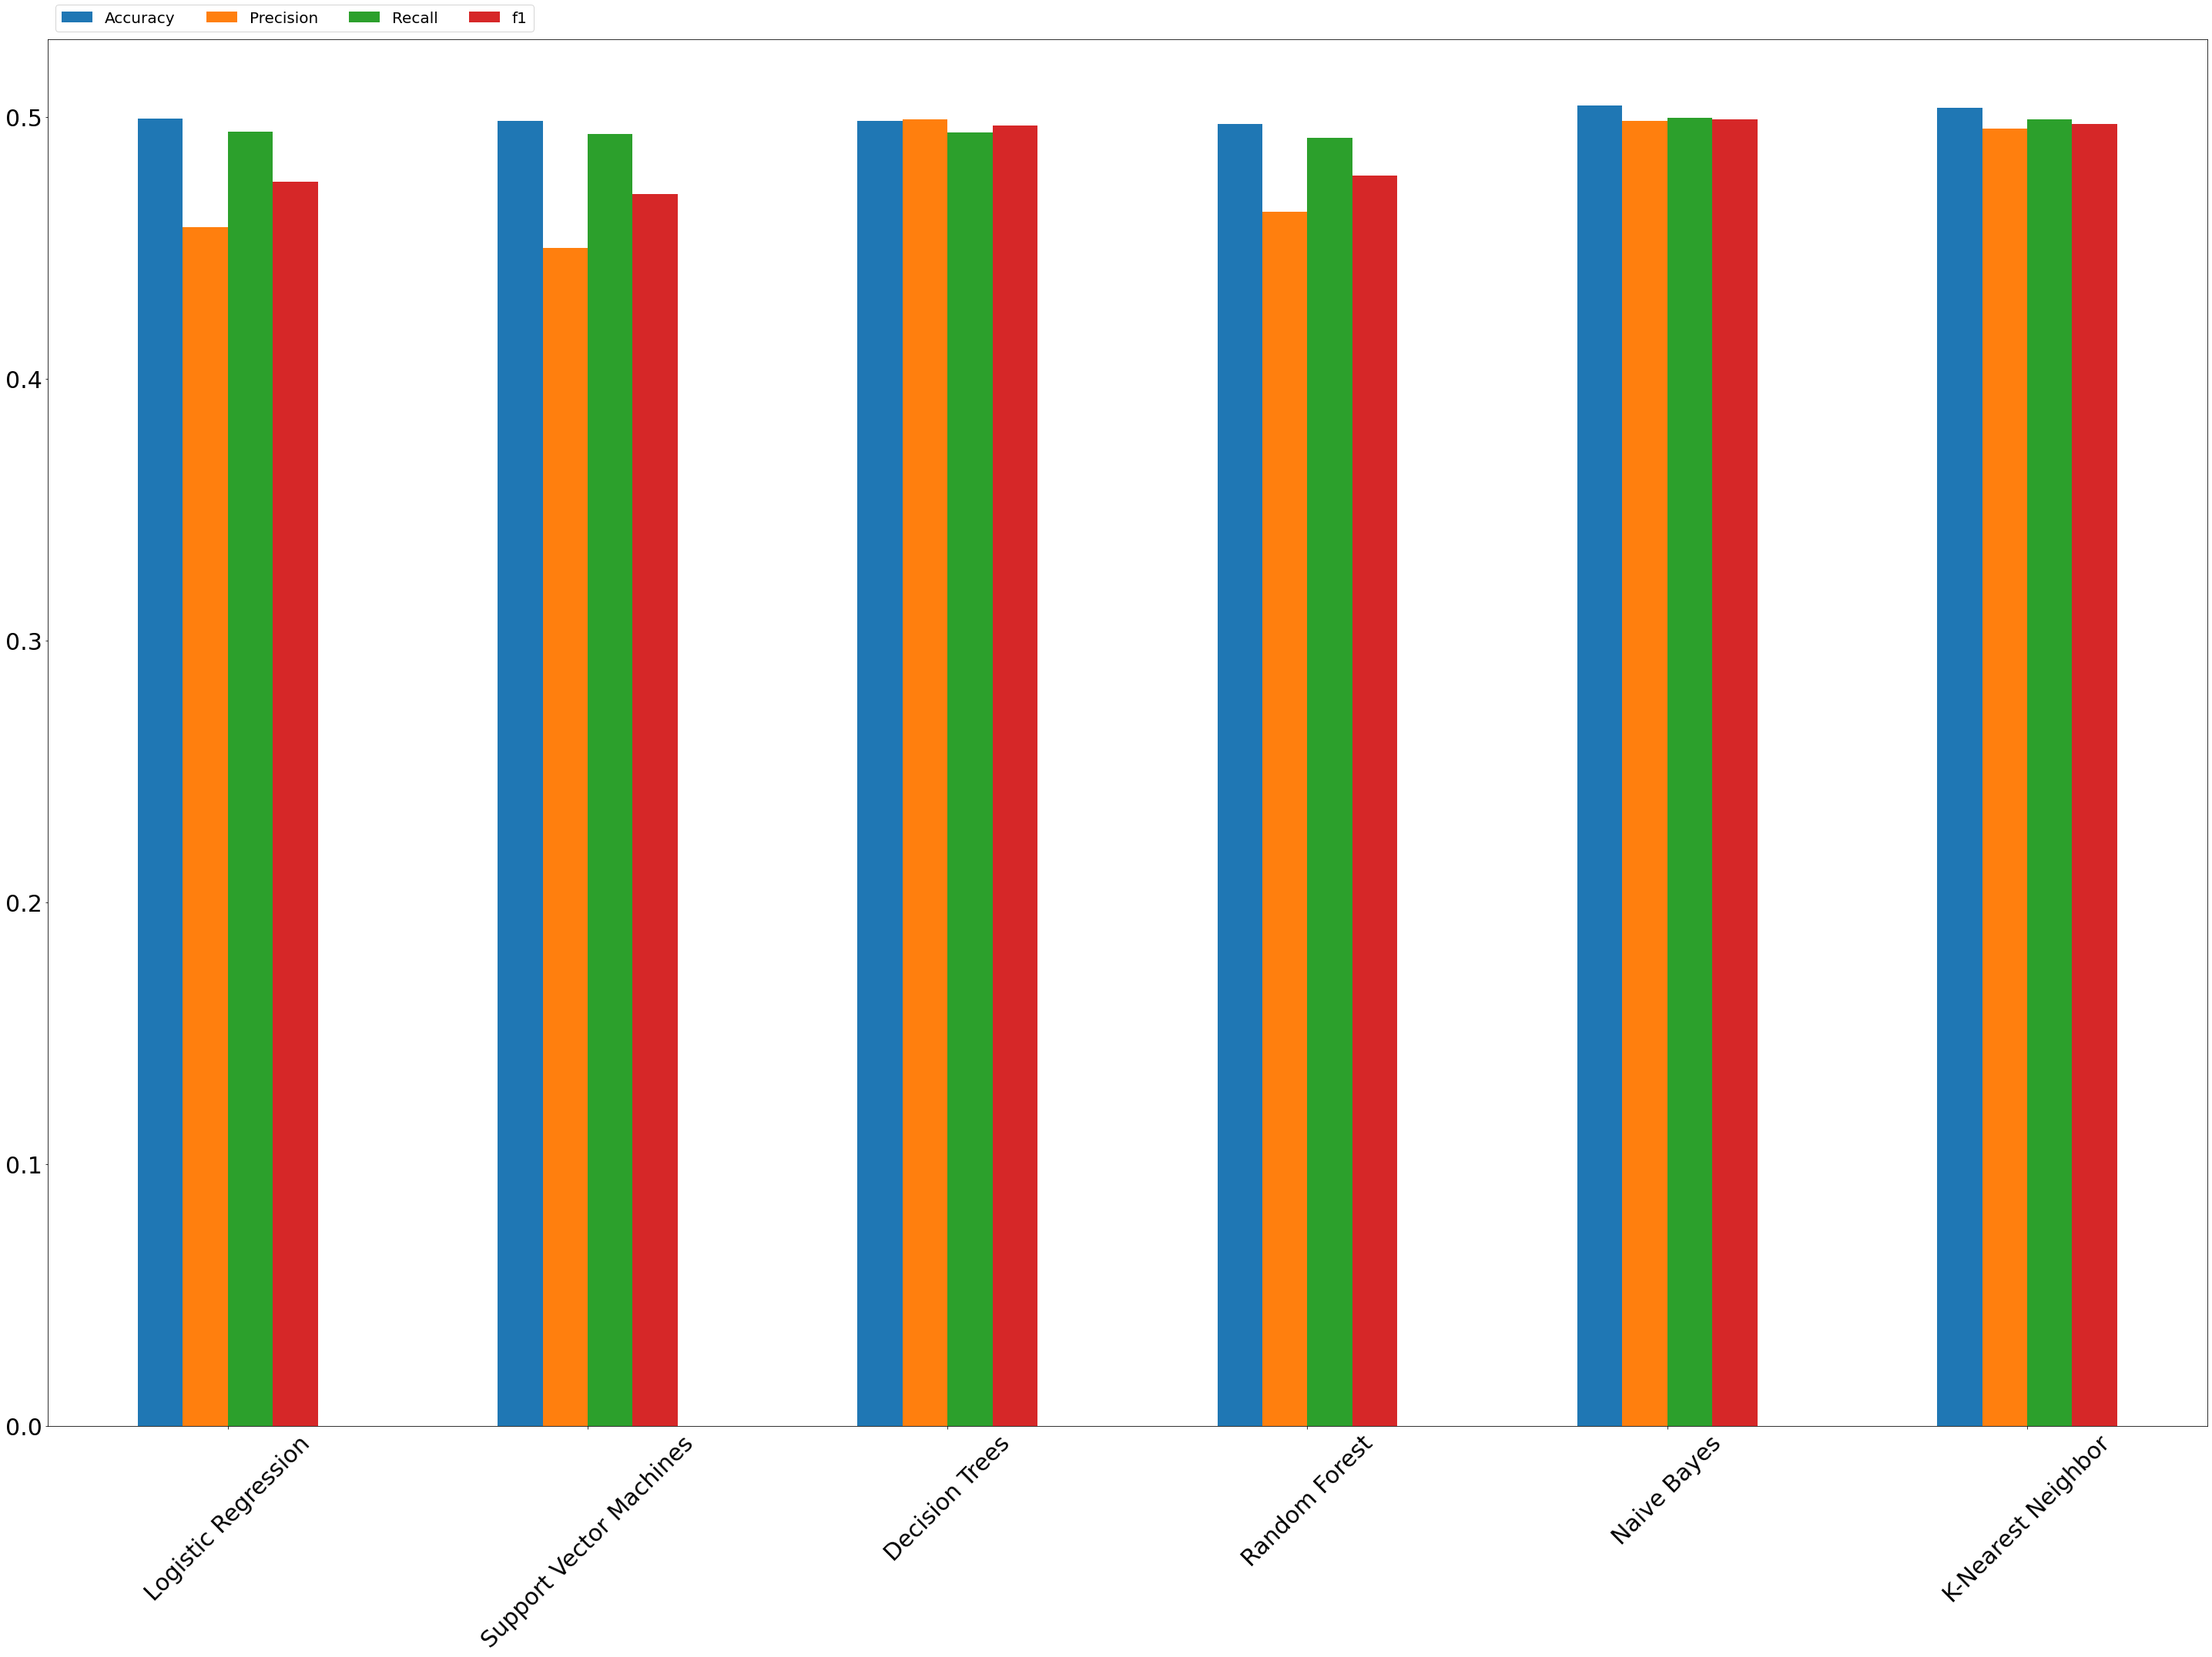

In [76]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score



accuracy, precision, recall,f1 = {}, {}, {},{}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_scaled, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test_scaled)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key]=f1_score(predictions,y_test)
    


    
    



df_check=pd.DataFrame(index=models.keys(),columns=["Accuracy","Precision","Recall","f1"])
df_check["Accuracy"]=accuracy.values()
df_check["Precision"]=precision.values()
df_check["Recall"]=recall.values()
df_check["f1"]=f1.values()


ax  = df_check.plot.bar(rot=45,figsize=(40,30),fontsize=30)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 20})
plt.tight_layout()

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
pca=decomposition.PCA()

In [55]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [51]:
dec_tree=DecisionTreeClassifier()

In [56]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [58]:
pipe = Pipeline(steps=[('pca', pca),('dec_tree', dec_tree)])

In [52]:
n_components = list(range(1,X_train_scaled.shape[1]+1,1))

In [53]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [54]:
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

In [60]:
grid=GridSearchCV(pipe,parameters,cv=10,n_jobs=1,verbose=2)

In [61]:
grid.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_dept

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=2, pca__n_components=9; total time=   0.1s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=1; total time=   0.2s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=1; total time=   0.2s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=1; total time=   0.1s
[CV] END dec_tree__c

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=8; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=8; total time=   0.2s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=8; total time=   0.2s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=4, pca__n_components=9; total time=   0.3s
[CV] END dec_tree__c

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=8; total time=   0.4s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=6, pca__n_components=9; total time=   0.4s
[CV] END dec_tree__c

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=7; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=7; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=7; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=7; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=7; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=8; total time=   0.5s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=8; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=8; total time=   0.5s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=8; total time=   0.5s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=8, pca__n_components=8; total time=   0.5s
[CV] END dec_tree__c

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=6; total time=   0.6s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=10, pca__n_components=7; total time=   0.7s
[CV] END d

[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.7s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=6; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=7; total time=   0.8s
[CV] END dec_tree__criterion=gini, dec_tree__max_depth=12, pca__n_components=7; total time=   0.8s
[CV] END d

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=5; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=6; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=6; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=6; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=2, pca__n_components=6; total tim

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=4; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=4; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=4; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=4; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=4, pca__n_components=5; total tim

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=3; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=3; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=6, pca__n_components=4; total tim

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=8, pca__n_components=3; total tim

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=2; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=3; total time=   0.5s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=10, pca__n_components=3;

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.2s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=1; total time=   0.3s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=2; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=2; total time=   0.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=2;

[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s
[CV] END dec_tree__criterion=entropy, dec_tree__max_depth=12, pca__n_components=9; total time=   1.4s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=2)

In [62]:
grid.best_params_

{'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 2,
 'pca__n_components': 7}

In [63]:
y_pred=grid.predict(X_test_scaled)

In [64]:
accuracy_score(y_test,y_pred)

0.5033

In [65]:
f1_score(y_test,y_pred)

0.28087447517011727

In [66]:
recall_score(y_test,y_pred)

0.19578161267534563

In [67]:
precision_score(y_test,y_pred)

0.4967989756722151

In [68]:

import pickle


In [69]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(grid, file)

In [70]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [71]:
y_pred=loaded_model.predict(X_test_scaled)

In [78]:
check=X_test.iloc[0,:].values


In [83]:
loaded_model.predict(check.reshape((1,-1)))[0]

0

In [85]:
X_train_scaled.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [72]:
recall_score(y_test,y_pred)

0.19578161267534563

In [73]:
f1_score(y_test,y_pred)

0.28087447517011727

# Deploying our model

In [102]:
%%writefile app.py




import streamlit as st
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import pickle




    




def check_churn(seq1):
    loaded_model=load_curr_model()
    
    k=loaded_model.predict(seq1.reshape((1,-1)))
    if(k==0):
        return "Will not churn"
    if(k==1):
        return "Will Churn"
    
    
    
st.title("Churn Prediction")
st.sidebar.header("User Input Features")

def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://editor.analyticsvidhya.com/uploads/17047What-stops-customer-churn-Having-a-centralized-data-hub-does-and-heres-why.jpeg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 
    
@st.cache_data()
def load_curr_model():
    with st.spinner('Model is being loaded..'):
        with open('decision_tree_model.pkl', 'rb') as file:
            model = pickle.load(file)
        return model
    
   

    # Get user input
age = st.sidebar.slider("Age", min_value=18, max_value=100, step=1)

# Subscription Length (in months)
subscription_length = st.sidebar.slider("Subscription Length (Months)", min_value=1, max_value=60, step=1)

# Monthly Bill
monthly_bill = st.sidebar.number_input("Monthly Bill", min_value=0.0, step=1.0)

# Total Usage (in GB)
total_usage_gb = st.sidebar.number_input("Total Usage (GB)", min_value=0.0, step=1.0)

# Gender (Male)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])

# Location
location_options = ["Houston", "Los Angeles", "Miami", "New York","Chicago"]
selected_location = st.sidebar.selectbox("Location", location_options)

# Convert gender and location to binary values (1 or 0)
gender_male_encoded = 1 if gender == "Male" else 0
location_encoded = [1 if selected_location == loc else 0 for loc in location_options]

# Create a button to trigger the prediction
if st.sidebar.button("Predict"):
    # Prepare the user input as a feature vector
    user_input = [age, subscription_length, monthly_bill, total_usage_gb, gender_male_encoded] + location_encoded[:-1]

    # Make a prediction
    prediction = check_churn(np.asarray(user_input).reshape((1,-1)))

    # Display the prediction result
    st.write("Churn Prediction:", prediction)
    

st.write("\n\n By Abhishek Ambast.")








Overwriting app.py


In [ ]:
!streamlit run app.py